## Domain Adversarial

In [1]:
import os
os.chdir('/workspace')
from trainer import * 


label_type_50 = {
    'colors':        ['beige', 'black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'red', 'red and white', 'tan', 'white', 'yellow'],
    'objects':       ['bench', 'chair', 'couch', 'floor', 'table', 'tv', 'blanket', 'book', 'frisbee', 'skateboard', 'soccer'],
    'living-things': ['baby', 'bird', 'boy', 'cat', 'dog', 'fish', 'flowers', 'girl', 'man', 'mouse', 'tree', 'woman'],
    'actions':       ['eating', 'playing', 'sitting', 'sleeping', 'standing', 'walking'],
    'locations':     ['park', 'sidewalk', 'living room', 'on table', 'sky'],
    'foods':         ['apple', 'pizza', 'sandwich', 'wine', 'food'],
    'numbers':       ['0', '1', '2', '3', '4', '5', '6'],
    'responses':     ['no', 'no one', 'nothing', 'yes'],
    'directions':    ['left', 'right'],
}

label_type_20 = {
    'colors':        ['beige', 'black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'red', 'red and white', 'tan', 'white', 'yellow'],
    'objects':       ['bench', 'chair', 'couch', 'floor', 'table', 'tv', 'blanket', 'book', 'frisbee', 'skateboard', 'soccer', 'bike', 'car', 'bottle', 'cup', 'plate'],
    'living-things': ['baby', 'bird', 'boy', 'cat', 'dog', 'fish', 'flowers', 'girl', 'man', 'mouse', 'tree', 'woman', 'duck', 'eagle', 'mushrooms'],
    'actions':       ['eating', 'playing', 'sitting', 'sleeping', 'standing', 'walking', 'running', 'jumping', 'drinking'],
    'locations':     ['park', 'sidewalk', 'living room', 'on table', 'sky', 'on floor', 'on grass'],
    'foods':         ['apple', 'pizza', 'sandwich', 'wine', 'food', 'cheese', 'hot dog', 'bread', 'steak'],
    'numbers':       ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
    'responses':     ['no', 'no one', 'nothing', 'yes'],
    'directions':    ['left', 'right'],
    'times':         ['morning', 'afternoon', 'evening', 'night'],
    'weather':       ['sunny', 'clouds', 'sunset', 'rainy'],
    'patterns':      ['checkered', 'floral'],
}


samples_per_answer = 50
label_type_to_labels = label_type_50
n_labels = 0
for k in label_type_to_labels:
    n_labels += len(label_type_to_labels[k])


cfg = {
    "name": "DANN",
    
    ### DataLoader ###
    "n_classes": n_labels,
    "n_types": len(label_type_to_labels),
    
    'label_type_to_labels': label_type_to_labels,
    
    "v2_samples_per_answer": samples_per_answer,
    "abs_samples_per_answer": samples_per_answer,
    
    "v2_samples_per_answer_train": samples_per_answer // 2,
    "abs_samples_per_answer_train": samples_per_answer // 2,
    
    "v2_samples_per_answer_val": samples_per_answer // 2,
    "abs_samples_per_answer_val": samples_per_answer // 2,
    
    "source_domain": "v2",
    
    ## Allow Min Samples
    "min_samples_mode": True,  # will use atleast samples_per_answer per label
    
    ## Augmentations ##
    'mask_patches': True,
    
    ### VLModel ###
    "image_encoder": "facebook/dinov2-base",
    "text_encoder": "bert-base-uncased",
    
    ## Embedder
    "num_attn_heads": 8,
    "fusion_mode": "cat",
    "num_stacked_attn": 1,
    "criss_cross__drop_p": 0.0,
    "post_concat__drop_p": 0.0,
    "embed_attn__add_residual": False,
    "embed_attn__drop_p": 0.0,
    
    ## Label Type
    'use_label_type_classifier': True,
    # 'use_label_type_classifier': False,
    'append_label_type_logits': False,
    'give_location_of_labels_in_label_type': True,
    
    ## Label Classifier
    "label_classifier__use_bn": False,
    "label_classifier__drop_p": 0.0,
    "label_classifier__repeat_layers": [0, 0],
    
    ## Domain Classifier
    "domain_classifier__use_bn": True,
    "domain_classifier__drop_p": 0.5,
    "domain_classifier__repeat_layers": [2, 2],
    
    ### Objective ###
    "domain_adaptation_method": "domain_adversarial",  # 'naive', 'importance_sampling', 'domain_adversarial'
    "train_modes": ['DANN', 'label_type', 'label'],  # ['DANN', 'label_type', 'label']
    
    ### Trainer ###
    "relaxation_period": 2,
    "epochs": 30,
    "batch_size": 10, # 900
    "base_lr": 1e-4,
    "weight_decay": 5e-4,
    
    ### Logging ###
    # "print_logs": False,
    "print_logs": True,
    "show_plot": True,
    "weights_save_root": "./weights/raw",
}

if True:
    # v2
    cfg["source_domain"] = "v2"
    trainer = DATrainer(cfg, vqa_v2, vqa_abs)
    v2_ckpt_path = cfg["weights_save_path"]

    trainer.train(show_plot=True)

    # abs
    # cfg["source_domain"] = "abs"
    # trainer = DATrainer(cfg, vqa_v2, vqa_abs)
    # abs_ckpt_path = cfg["weights_save_path"]

    # trainer.train(show_plot=True)

In [2]:
# v2_ckpt_path = './weights/raw/name=DANN__n_classes=10__v2_samples_per_answer=300__abs_samples_per_answer=150__source_domain=v2__base_lr=0.001__domain_adaptation_method=domain_adversarial__.pth'

# abs_ckpt_path = './weights/raw/name=DANN__n_classes=10__v2_samples_per_answer=300__abs_samples_per_answer=150__source_domain=abs__base_lr=0.001__domain_adaptation_method=domain_adversarial__.pth'

# v2_ckpt_path = 'weights/raw/pKqoGdSZ.pth'
# abs_ckpt_path = 'weights/raw/pKqoGdSZ.pth'

In [3]:
cfg['v2_ckpt'] = v2_ckpt_path
# cfg['abs_ckpt'] = abs_ckpt_path
cfg['abs_ckpt'] = v2_ckpt_path

## Evaluating

In [10]:
import random
from torch.utils.data import Subset

(v2_train_data, v2_val_data), (abs_train_data, abs_val_data) = data_processing_v2(cfg, vqa_v2, vqa_abs)
model = DANN_VLModel(cfg, return_embeddings=True).cuda()

def eval_domain_adaptation(eval_dataset, model_ckpt, evaluate_train=False):
    if eval_dataset == 'v2':
        train_data, val_data = v2_train_data, v2_val_data
    elif eval_dataset == 'abs':
        train_data, val_data = abs_train_data, abs_val_data

    train_dataset = VQADataset(cfg, train_data)
    val_dataset = VQADataset(cfg, val_data)
    
    val_size = len(val_dataset)
    train_indices = random.sample(range(len(train_dataset)), val_size)
    train_dataset = Subset(train_dataset, train_indices)

    train_dataloader = DataLoader(train_dataset, batch_size=cfg['batch_size'], shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=cfg['batch_size'], shuffle=True)

    if model_ckpt == 'v2':
        ckpt = cfg['v2_ckpt']
    elif model_ckpt == 'abs':
        ckpt = cfg['abs_ckpt']

    state_dict = torch.load(ckpt, weights_only=True)
    model.load_state_dict(state_dict, strict=False)

    dataloader = val_dataloader if not evaluate_train else train_dataloader

    model.eval()
    correct, total = 0, 0
    embeddings = None

    with torch.no_grad():
        for i_tokens, q_tokens, label, label_type in dataloader:
            i_tokens = {key: value.cuda() for key, value in i_tokens.items()}
            q_tokens = {key: value.cuda() for key, value in q_tokens.items()}
            label, label_type = label.cuda(), label_type.cuda()
            
            label_logits, domain_logits, label_type_logits, embedding = model(i_tokens, q_tokens)
            embeddings = np.concatenate((embeddings, embedding), axis=0) if embeddings is not None else embedding

            # Compute accuracy
            _, predicted_indices = torch.max(label_logits, dim=1)
            label_indices = torch.argmax(label, dim=1)
            is_correct = (predicted_indices == label_indices)

            total += label.shape[0]
            correct += is_correct.sum().item()

    accuracy = (correct / total)

    source = 'v2 ' if model_ckpt == 'v2' else 'abs'
    target = 'v2 ' if eval_dataset == 'v2' else 'abs'
    split = 'train set' if evaluate_train else 'val set  '
    print(f'{source} -> {target} | {split} \t accuracy = {accuracy*100:.2f}%')
    
    return embeddings

Labels: ['beige', 'black', 'blue', 'brown', 'gray', 'green', 'orange', 'pink', 'red', 'red and white', 'tan', 'white', 'yellow', 'bench', 'chair', 'couch', 'floor', 'table', 'tv', 'blanket', 'book', 'frisbee', 'skateboard', 'soccer', 'baby', 'bird', 'boy', 'cat', 'dog', 'fish', 'flowers', 'girl', 'man', 'mouse', 'tree', 'woman', 'eating', 'playing', 'sitting', 'sleeping', 'standing', 'walking', 'park', 'sidewalk', 'living room', 'on table', 'sky', 'apple', 'pizza', 'sandwich', 'wine', 'food', '0', '1', '2', '3', '4', '5', '6', 'no', 'no one', 'nothing', 'yes', 'left', 'right']
Number of Common Labels = 65 | n_classes = 65
V2: 	Train size = 131351             | Val size = 1625 | Total = 132976
Abs: 	Train size = 43837             | Val size = 1625 | Total = 45462
--------------------


In [11]:
# v2 -> v2
v2_val_embeddings = eval_domain_adaptation(model_ckpt='v2', eval_dataset='v2', evaluate_train=False)
v2_train_embeddings = eval_domain_adaptation(model_ckpt='v2', eval_dataset='v2', evaluate_train=True)

# abs -> abs
abs_val_embeddings = eval_domain_adaptation(model_ckpt='abs', eval_dataset='abs', evaluate_train=False)
abs_train_embeddings = eval_domain_adaptation(model_ckpt='abs', eval_dataset='abs', evaluate_train=True)

v2  -> v2  | val set   	 accuracy = 23.38%
v2  -> v2  | train set 	 accuracy = 49.23%
abs -> abs | val set   	 accuracy = 27.08%
abs -> abs | train set 	 accuracy = 57.17%


In [12]:
# v2 -> abs
v2_abs_val_embeddings = eval_domain_adaptation(model_ckpt='v2', eval_dataset='abs', evaluate_train=False)
v2_abs_train_embeddings = eval_domain_adaptation(model_ckpt='v2', eval_dataset='abs', evaluate_train=True)

# abs -> v2
abs_v2_val_embeddings = eval_domain_adaptation(model_ckpt='abs', eval_dataset='v2', evaluate_train=False)
abs_v2_train_embeddings = eval_domain_adaptation(model_ckpt='abs', eval_dataset='v2', evaluate_train=True)

v2  -> abs | val set   	 accuracy = 27.08%
v2  -> abs | train set 	 accuracy = 59.26%
abs -> v2  | val set   	 accuracy = 23.38%
abs -> v2  | train set 	 accuracy = 45.23%


## Visualizing embeddings

In [13]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

def plot_tsne(embeddings, plot_labels, perplexities, title=''):
    n_plots = len(perplexities)
    fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 6))
    
    for idx, perplexity in enumerate(perplexities):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        tsne_embeddings = tsne.fit_transform(embeddings)
        
        colors = {'vv': 'blue', 'aa': 'red', 'va': 'orange', 'av': 'violet'}
        ax = axes[idx]
        for i, plot_label in enumerate(plot_labels):
                
            ax.scatter(tsne_embeddings[i, 0], tsne_embeddings[i, 1], color=colors[plot_label])
            ax.text(tsne_embeddings[i, 0] + 0.1, tsne_embeddings[i, 1], '', fontsize=9)
        
        ax.set_title(f'Perplexity = {perplexity}')
    
    custom_legend = [mpatches.Patch(color=colors[label], label=label) for label in set(plot_labels)]
    fig.legend(handles=custom_legend)
    fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

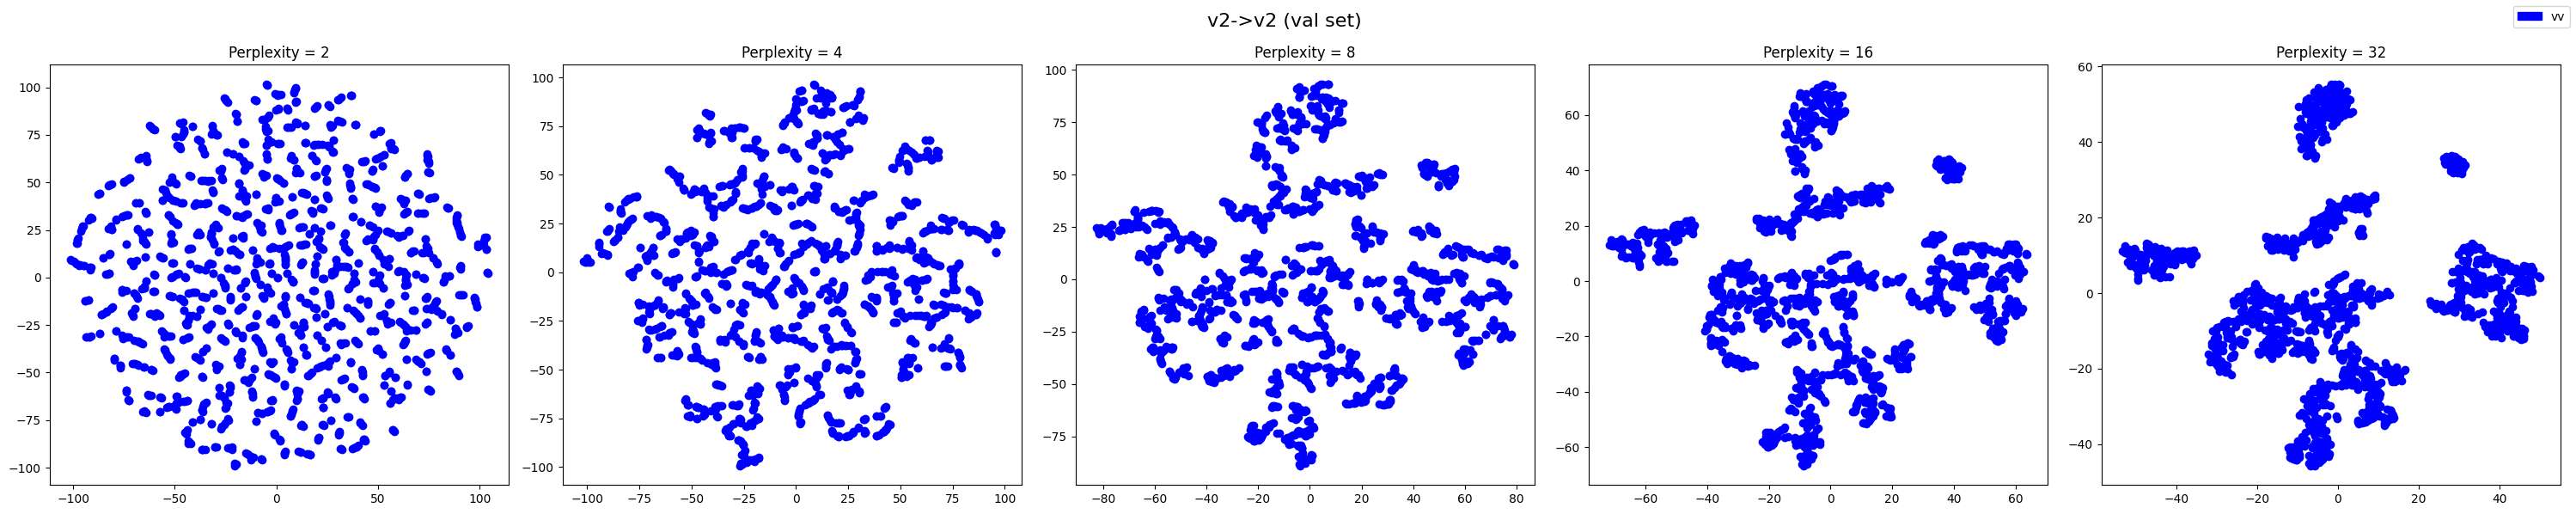

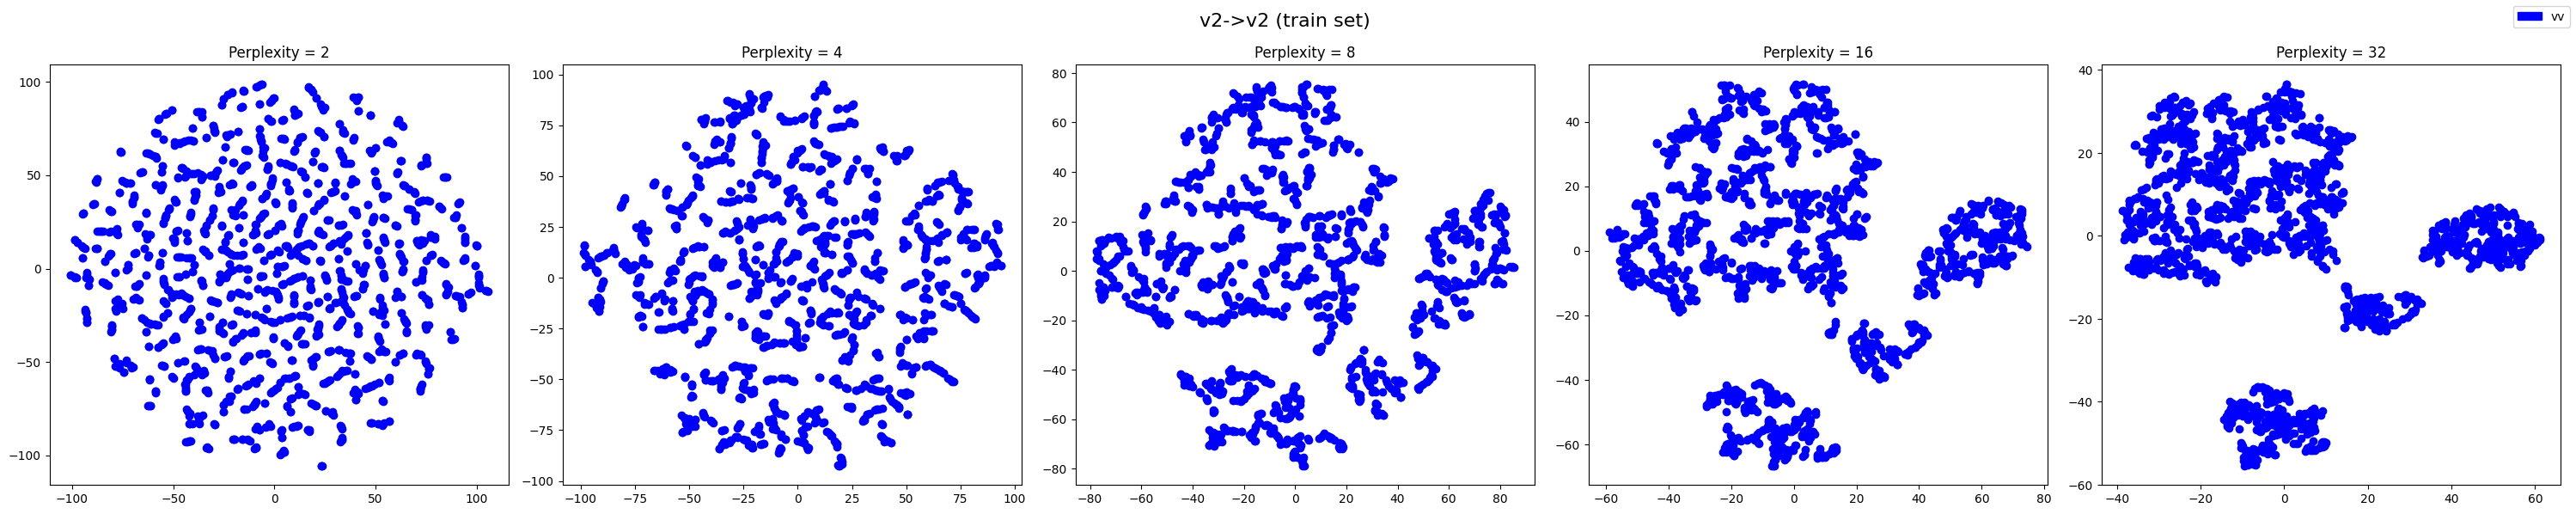

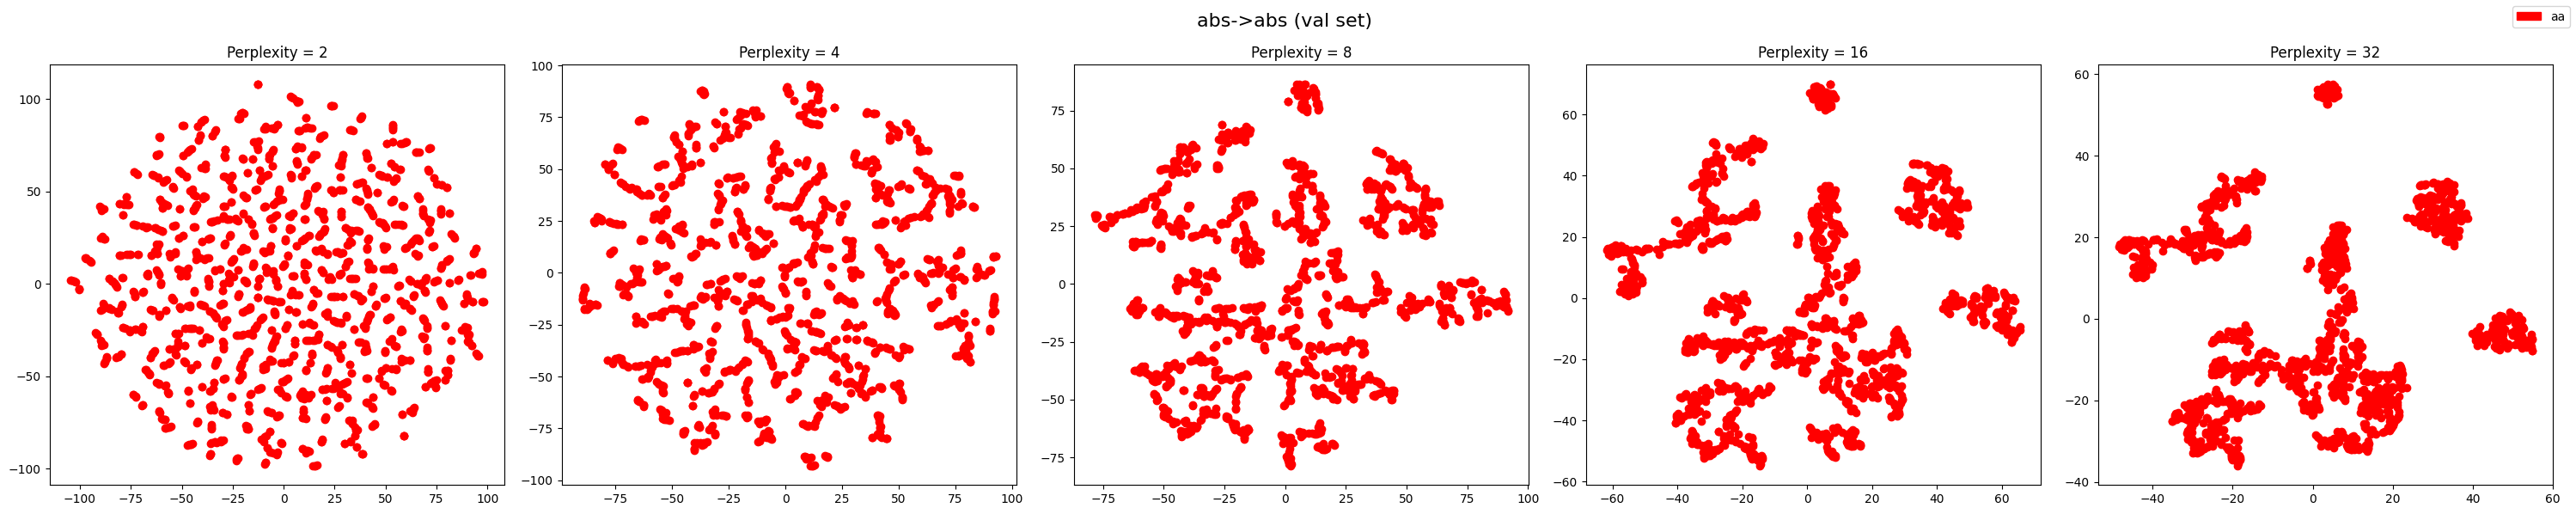

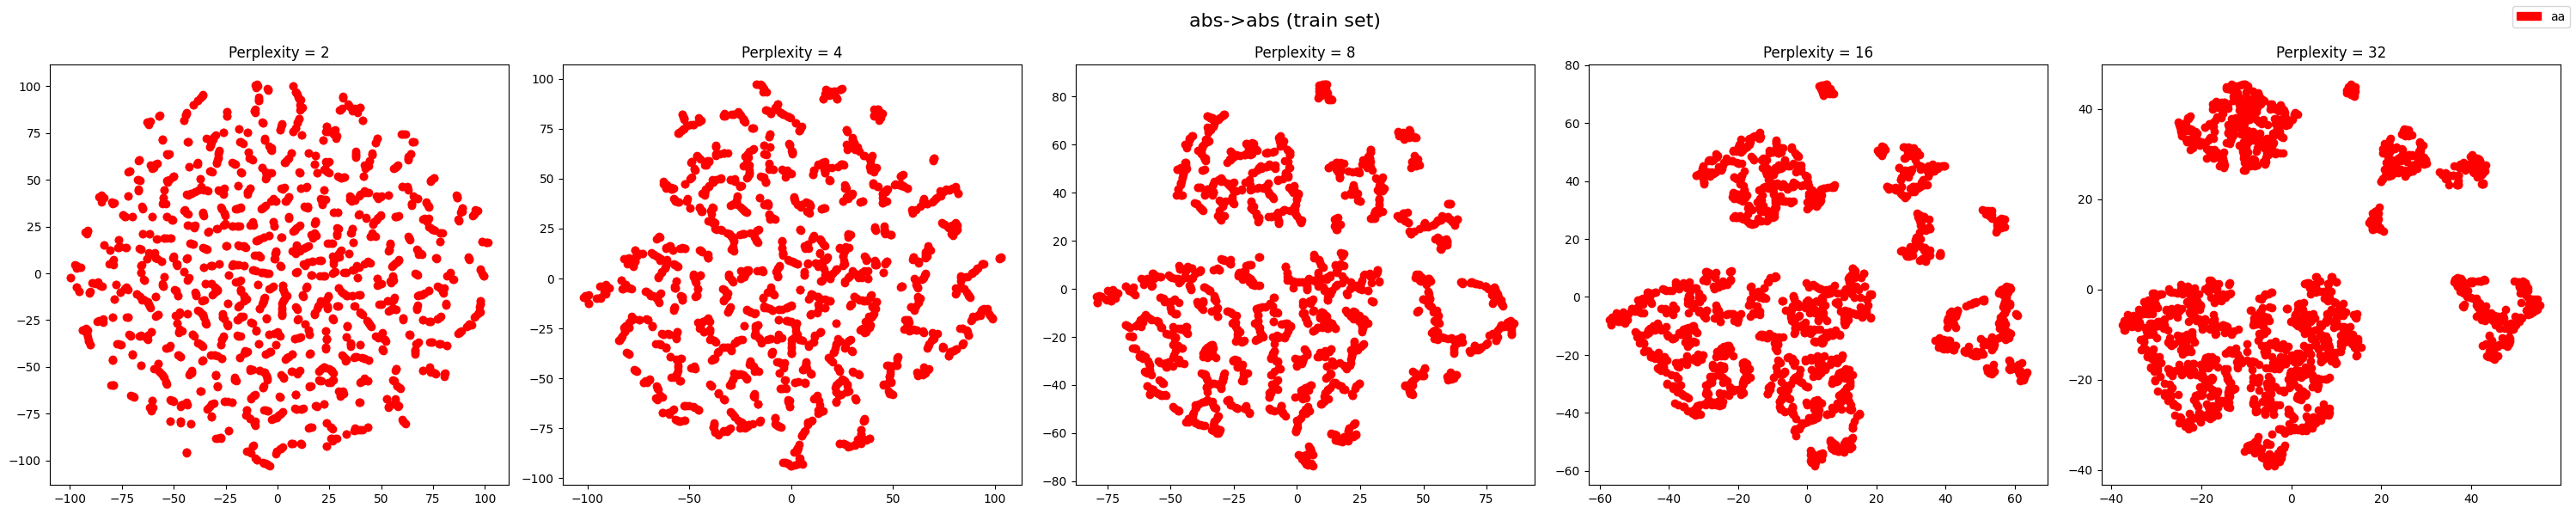

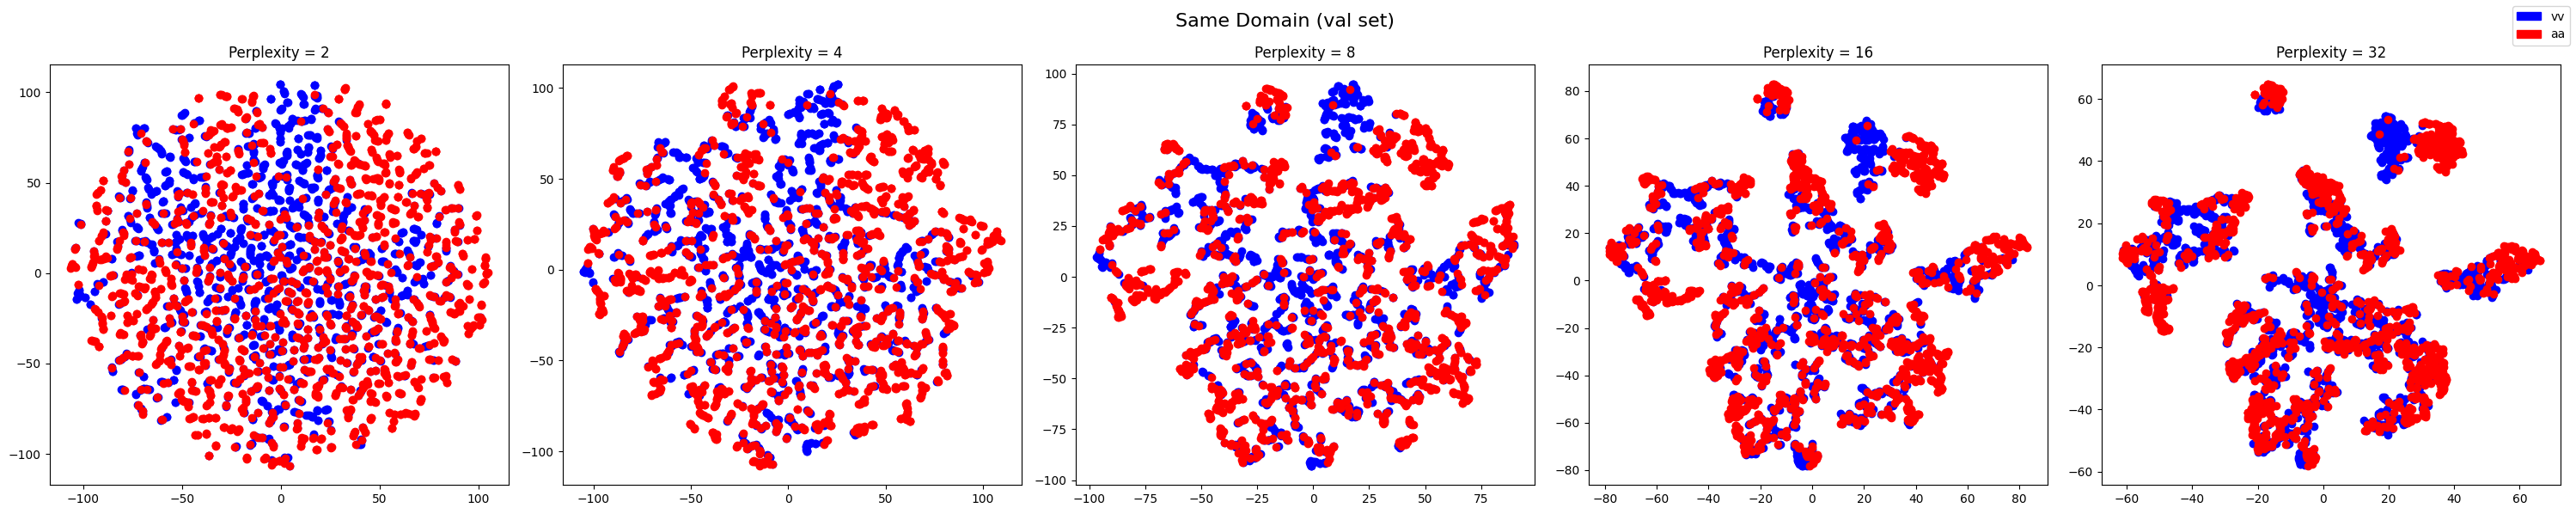

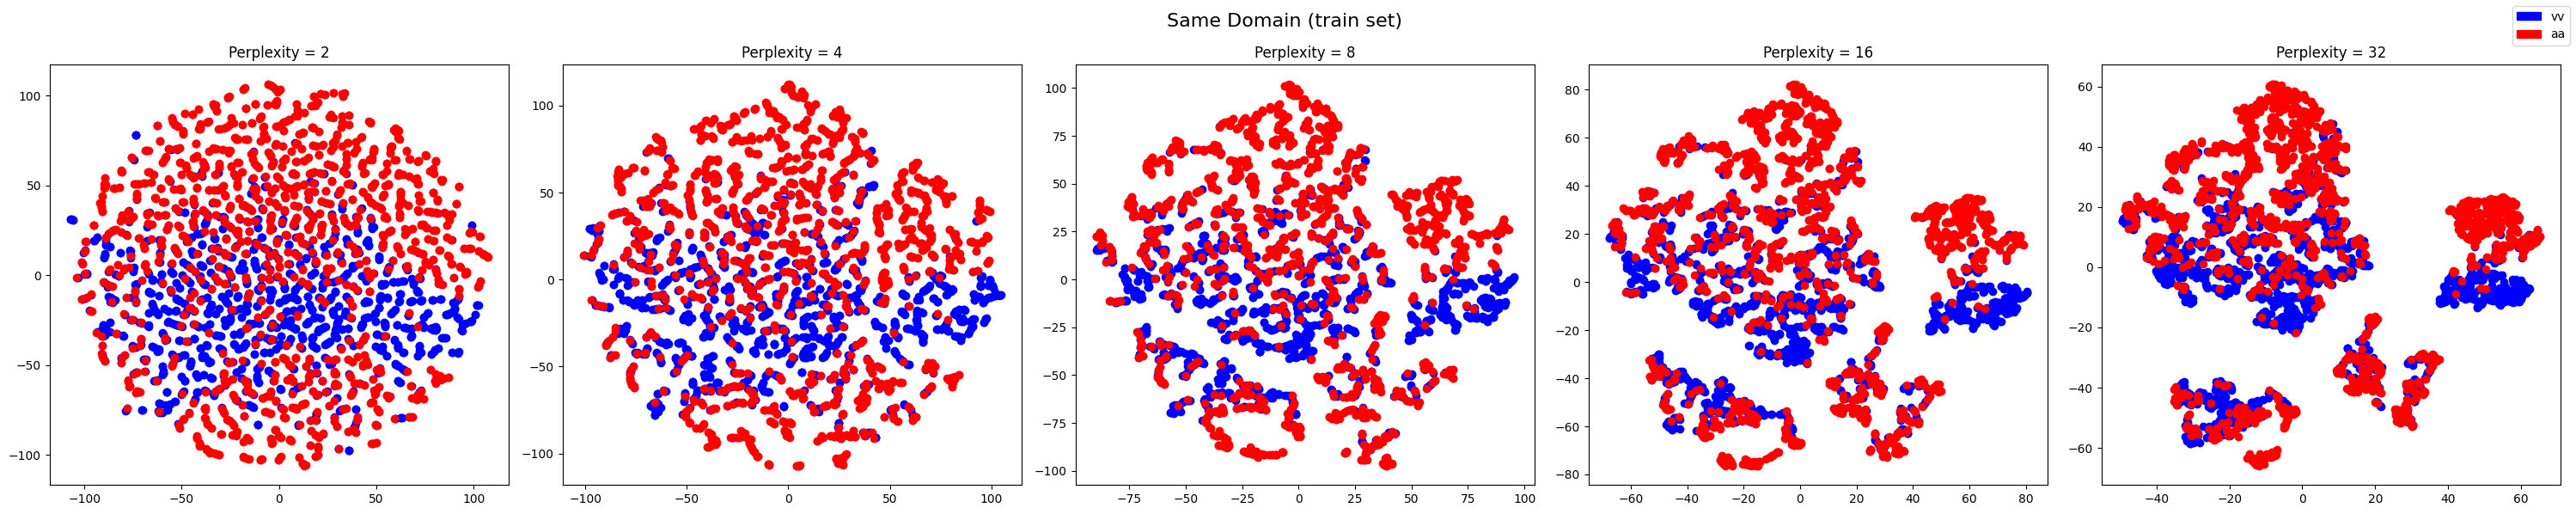

In [14]:
n_v2 = len(v2_val_embeddings)
n_abs = len(abs_val_embeddings)

# v2 -> v2
plot_tsne(v2_val_embeddings, ['vv'] * n_v2, perplexities=[2,4,8,16,32], title='v2->v2 (val set)')
plot_tsne(v2_train_embeddings, ['vv'] * n_v2, perplexities=[2,4,8,16,32], title='v2->v2 (train set)')

# abs -> abs
plot_tsne(abs_val_embeddings, ['aa'] * n_abs, perplexities=[2,4,8,16,32], title='abs->abs (val set)')
plot_tsne(abs_train_embeddings, ['aa'] * n_abs, perplexities=[2,4,8,16,32], title='abs->abs (train set)')

# combined plot
val_embeddings = np.concatenate((v2_val_embeddings, abs_val_embeddings), axis=0)
plot_tsne(val_embeddings, ['vv'] * n_v2 + ['aa'] * n_abs, perplexities=[2,4,8,16,32], title='Same Domain (val set)')

train_embeddings = np.concatenate((v2_train_embeddings, abs_train_embeddings), axis=0)
plot_tsne(train_embeddings, ['vv'] * n_v2 + ['aa'] * n_abs, perplexities=[2,4,8,16,32], title='Same Domain (train set)')

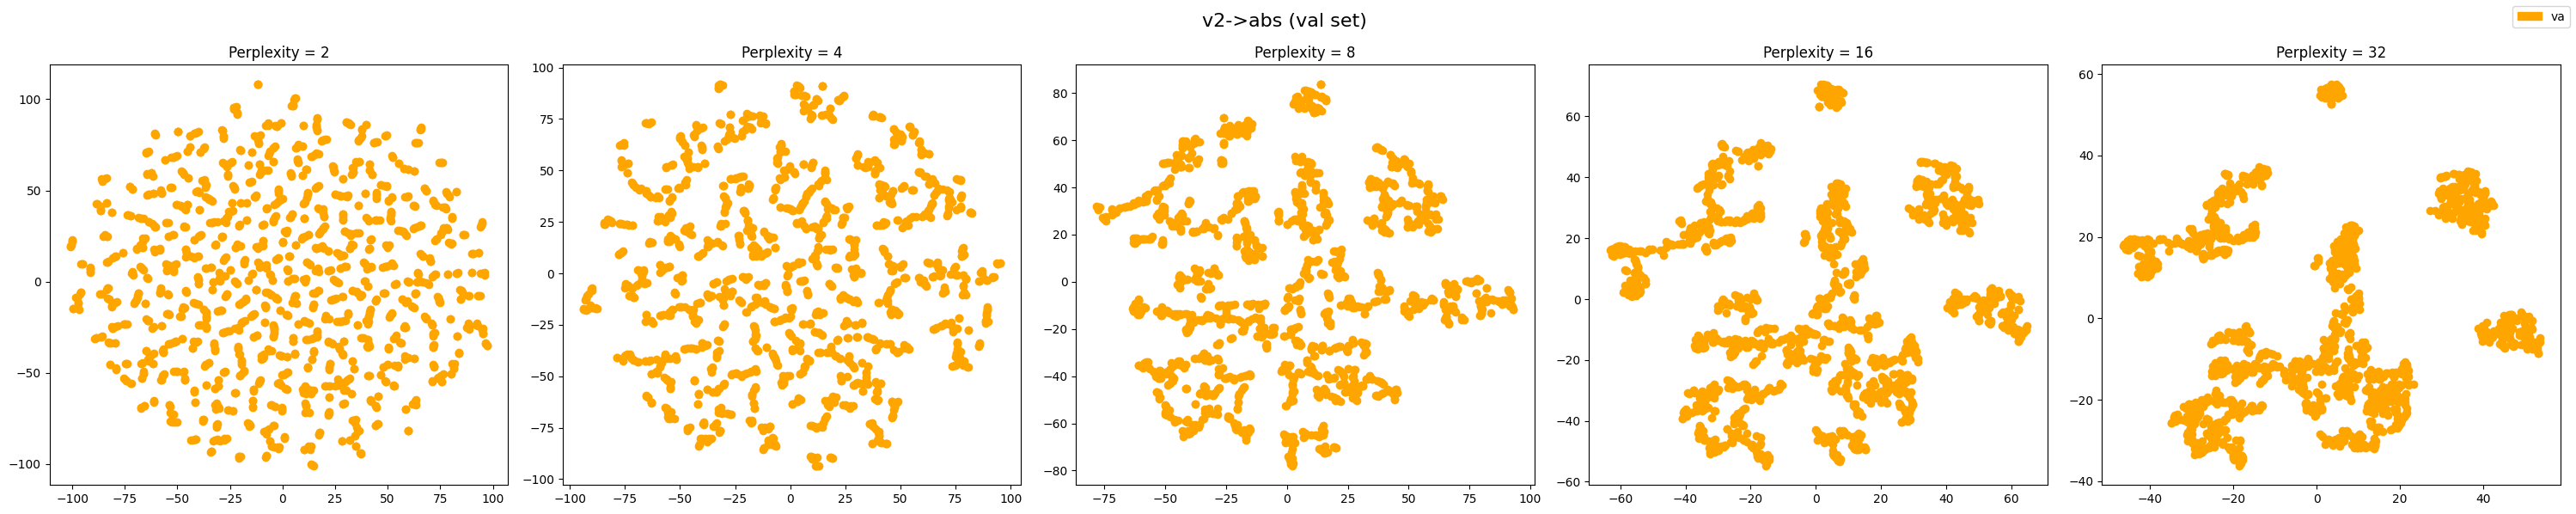

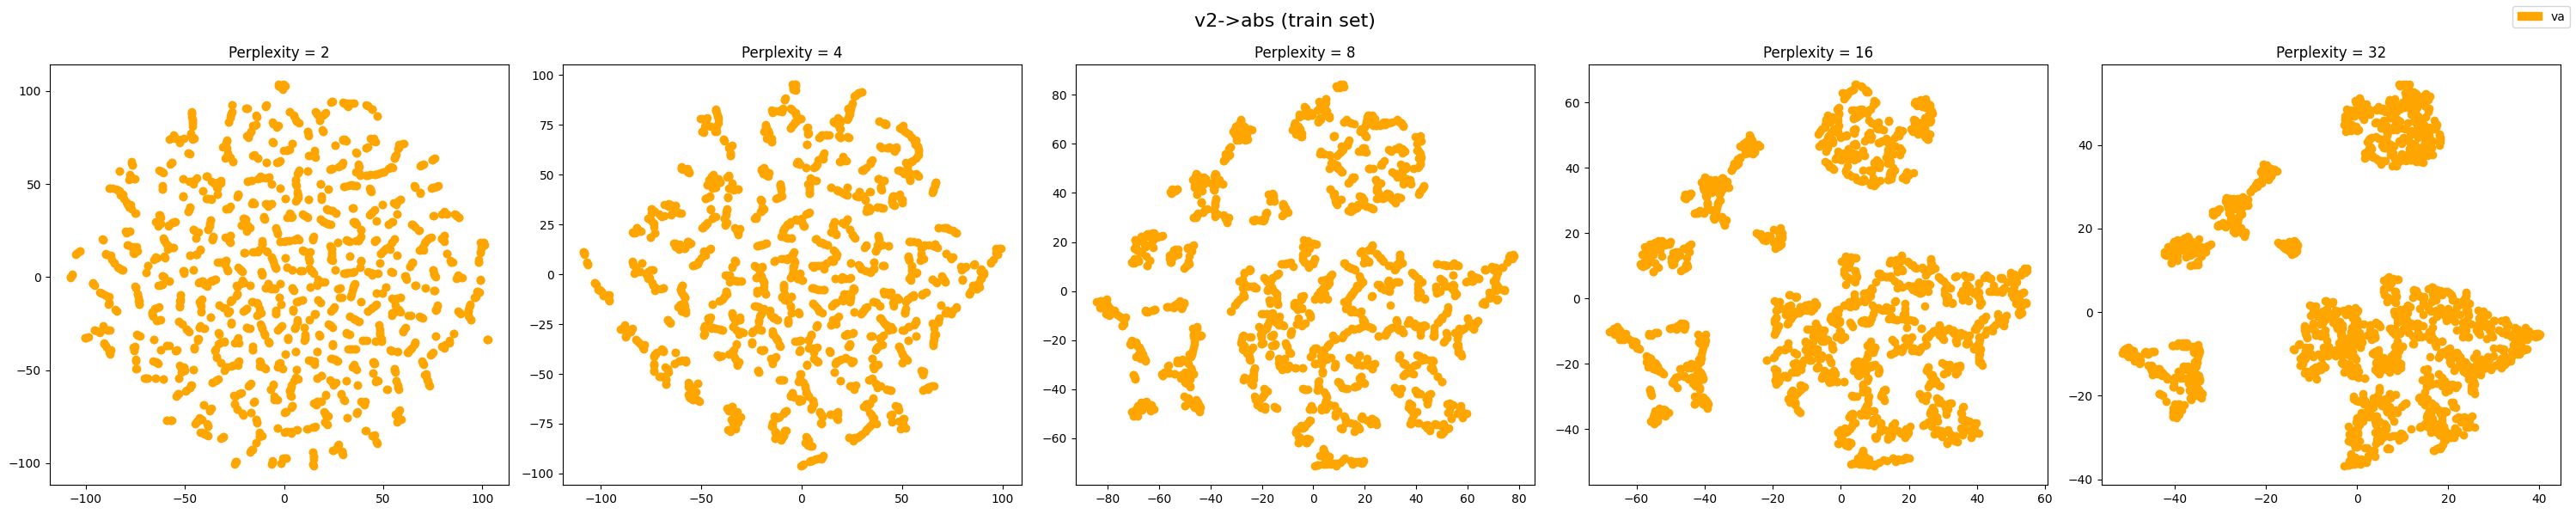

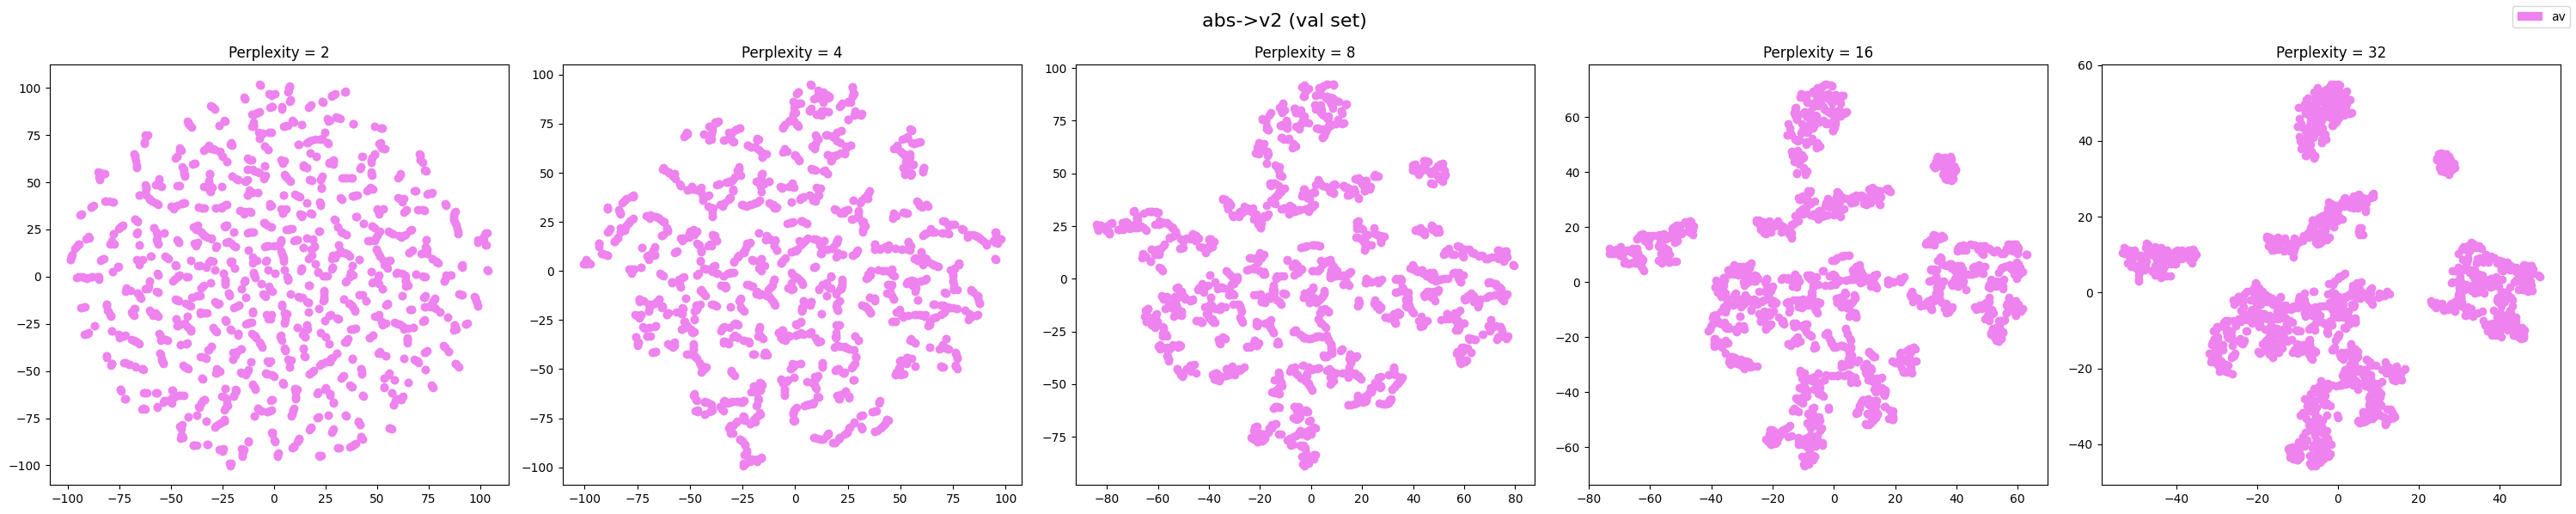

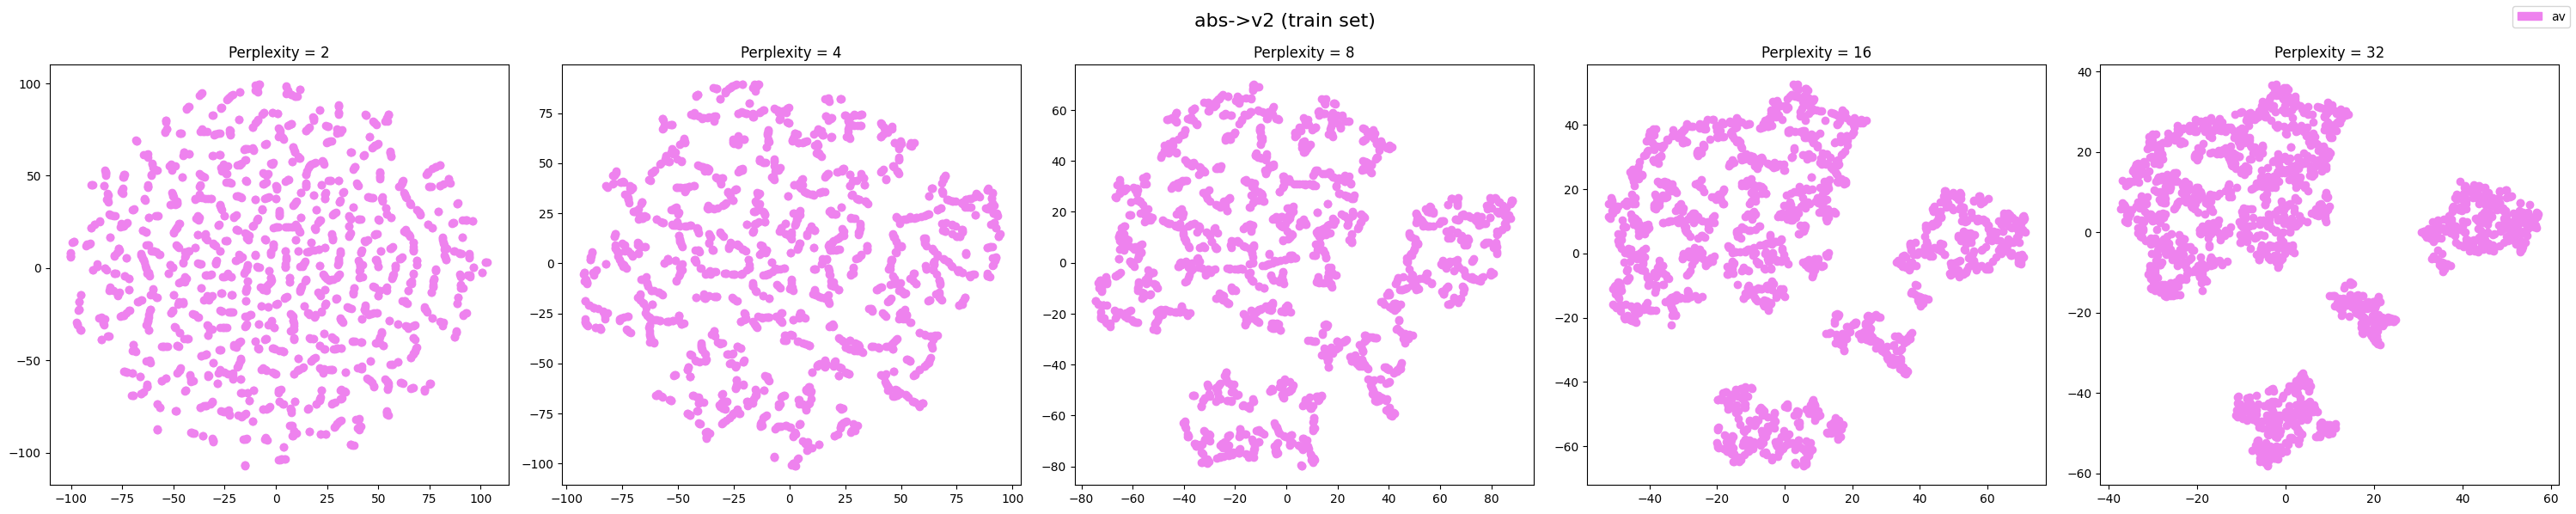

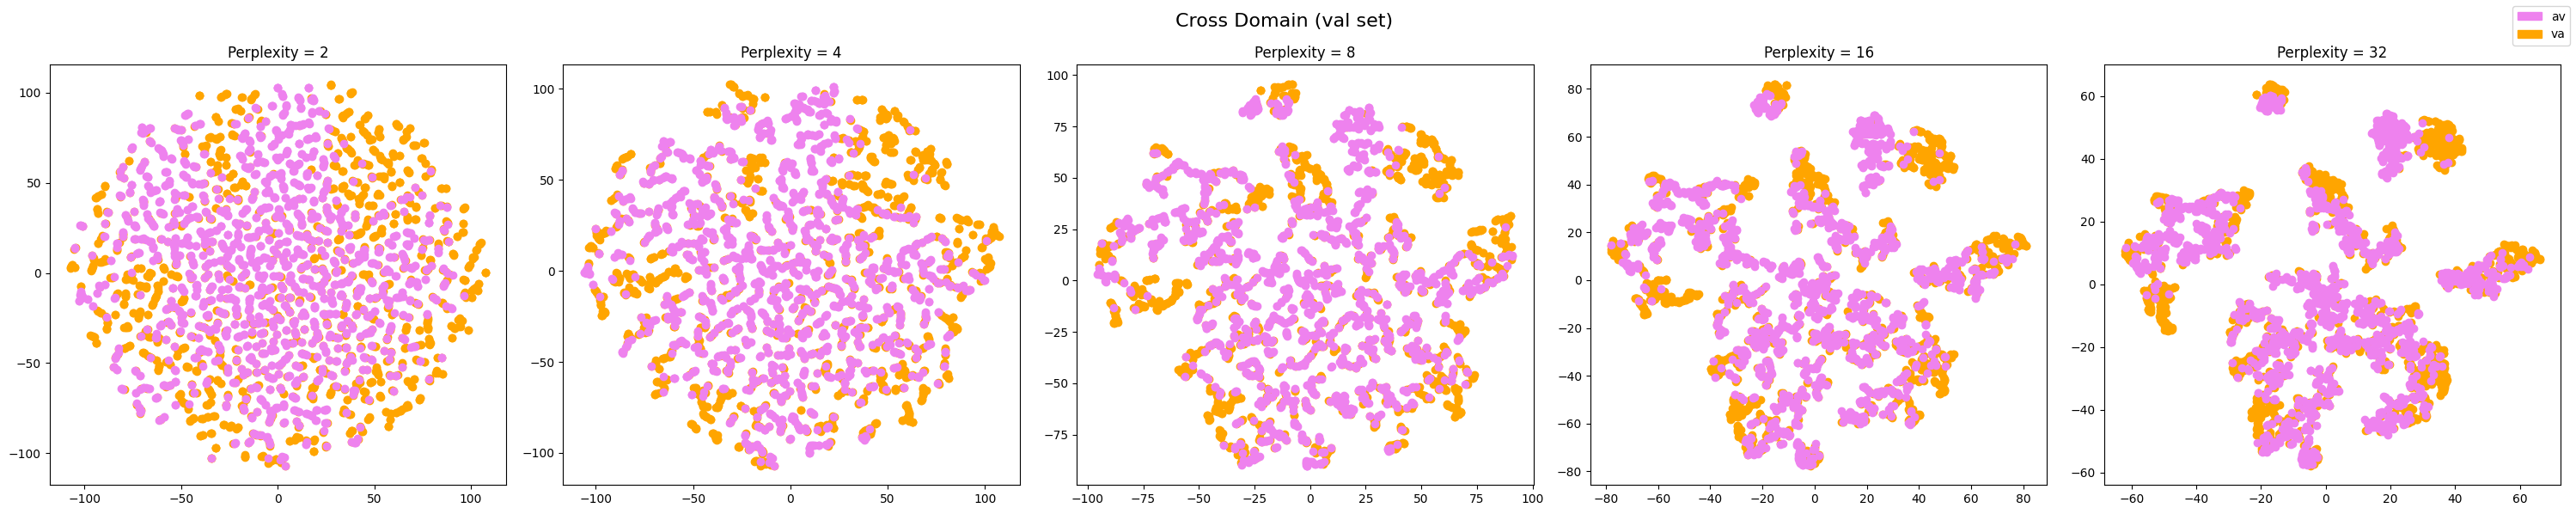

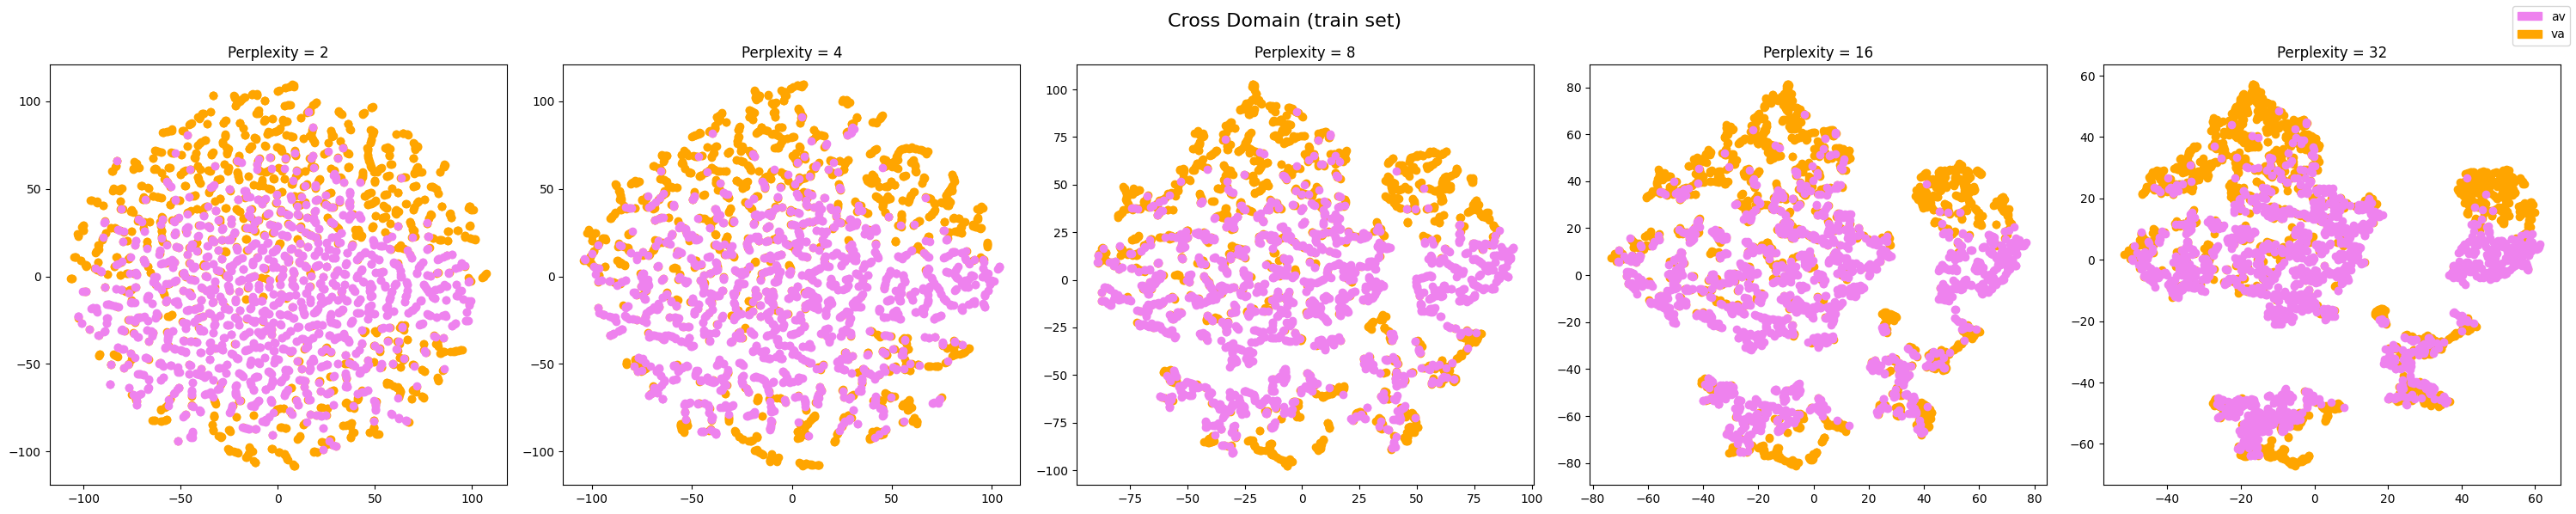

In [15]:
# v2 -> abs
plot_tsne(v2_abs_val_embeddings, ['va'] * n_abs, perplexities=[2,4,8,16,32], title='v2->abs (val set)')
plot_tsne(v2_abs_train_embeddings, ['va'] * n_abs, perplexities=[2,4,8,16,32], title='v2->abs (train set)')

# abs -> v2
plot_tsne(abs_v2_val_embeddings, ['av'] * n_v2, perplexities=[2,4,8,16,32], title='abs->v2 (val set)')
plot_tsne(abs_v2_train_embeddings, ['av'] * n_v2, perplexities=[2,4,8,16,32], title='abs->v2 (train set)')

# combined plot
val_embeddings = np.concatenate((v2_abs_val_embeddings, abs_v2_val_embeddings), axis=0)
plot_tsne(val_embeddings, ['va'] * n_abs + ['av'] * n_v2, perplexities=[2,4,8,16,32], title='Cross Domain (val set)')

train_embeddings = np.concatenate((v2_abs_train_embeddings, abs_v2_train_embeddings), axis=0)
plot_tsne(train_embeddings, ['va'] * n_abs + ['av'] * n_v2, perplexities=[2,4,8,16,32], title='Cross Domain (train set)')